In [1]:
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer()

In [21]:
#Ersteinmal ein Einblick über den Datensatz mittels Panda und der head() Funktion
import pandas as pd 

data_features = pd.DataFrame(data = data.data, 
                       columns = data.feature_names) 
data_targets = data.target
print(data_features.shape)
print(data_targets.shape)
print(data_features.head().T)
print(data_targets[0:5])


(569, 30)
(569,)
                                   0            1            2           3  \
mean radius                17.990000    20.570000    19.690000   11.420000   
mean texture               10.380000    17.770000    21.250000   20.380000   
mean perimeter            122.800000   132.900000   130.000000   77.580000   
mean area                1001.000000  1326.000000  1203.000000  386.100000   
mean smoothness             0.118400     0.084740     0.109600    0.142500   
mean compactness            0.277600     0.078640     0.159900    0.283900   
mean concavity              0.300100     0.086900     0.197400    0.241400   
mean concave points         0.147100     0.070170     0.127900    0.105200   
mean symmetry               0.241900     0.181200     0.206900    0.259700   
mean fractal dimension      0.078710     0.056670     0.059990    0.097440   
radius error                1.095000     0.543500     0.745600    0.495600   
texture error               0.905300     0.7339

In [93]:
#Es gibt also 569 Einträger für 30 Columns, nun zur Frage welche Columns es gibt:
column_names = data_features.columns.tolist()
print("Column names:", column_names)
#Auch die Frage was unser Target bedeutet:
print(data.target_names)
#einen dataframe mit allem
data_set = data_features
data_set['Diagnose']=data.target

Column names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
['malignant' 'benign']


In [67]:
#Ersteinmal die Frage ob die Daten einheitliche Datentypen haben:
for j in range(data_features.shape[0]): 
    my_type = type(data_features.iloc[j, 0])
    for i in range(data_features.shape[1]):
        if type(data_features.iloc[0, i])== my_type:
            continue
        else:
            print("Typeänderung in : ", column_names[i],j)
#Nun gilt es zu überprüfen ob es leere Datensätze bzw. ob Daten fehlen:
for j in range(data_features.shape[0]): 
    
    for i in range(data_features.shape[1]):
        if data_features.iloc[0, i]== 0:
            print("Nullwert in: ", column_names[i],j)

Text(0, 0.5, 'mean compactness ')

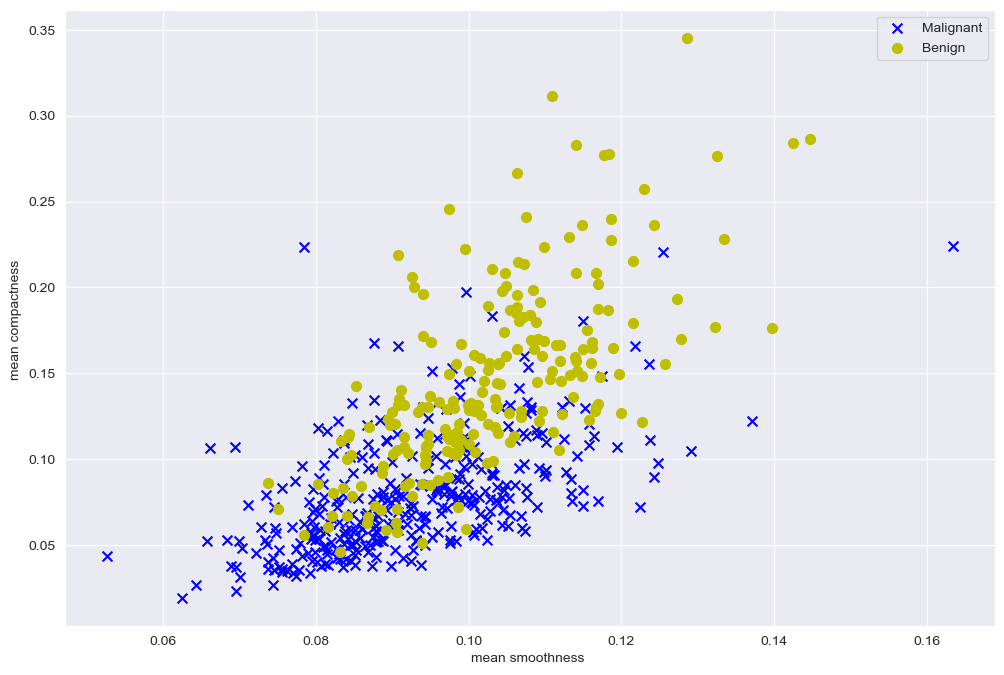

In [98]:
import matplotlib.pyplot as plt
#seperiere die Daten nach Diagnose
data_set_malign = data_set[data_set['Diagnose']==1]
data_set_benign = data_set[data_set['Diagnose']==0]

#50 randomisierte Werte je nach Diagnose getrennt von 2 Indikatoren in einer 2-D Anschauung


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data_set_malign['mean smoothness'], data_set_malign['mean compactness'], s=50, c='b', marker='x', label='Malignant')
ax.scatter(data_set_benign['mean smoothness'], data_set_benign['mean compactness'], s=50, c='y', marker='o', label='Benign')
ax.legend()
ax.set_xlabel('mean smoothness ')
ax.set_ylabel('mean compactness ')

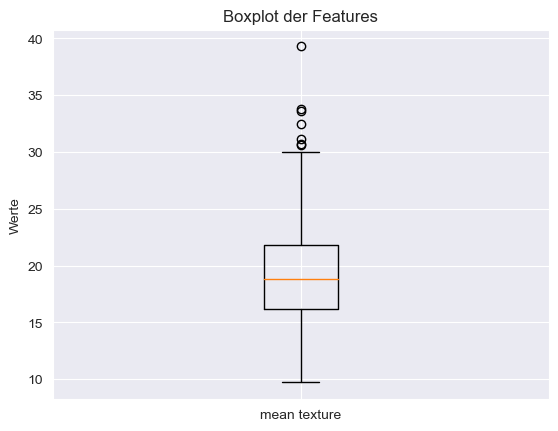

In [33]:
import matplotlib.pyplot as plt
#Mit dem neuen Verstädnis über unseren Datensatz gilt es nun dies zu visualisieren, um etwaige Ausreißer zu identifizieren
#for i in range(data_features.shape[1]):
i=1
# Boxplot erstellen
plt.boxplot([data_features[column_names[i]]], labels=[column_names[i]])
plt.title('Boxplot der Features')
plt.ylabel('Werte')
plt.show()

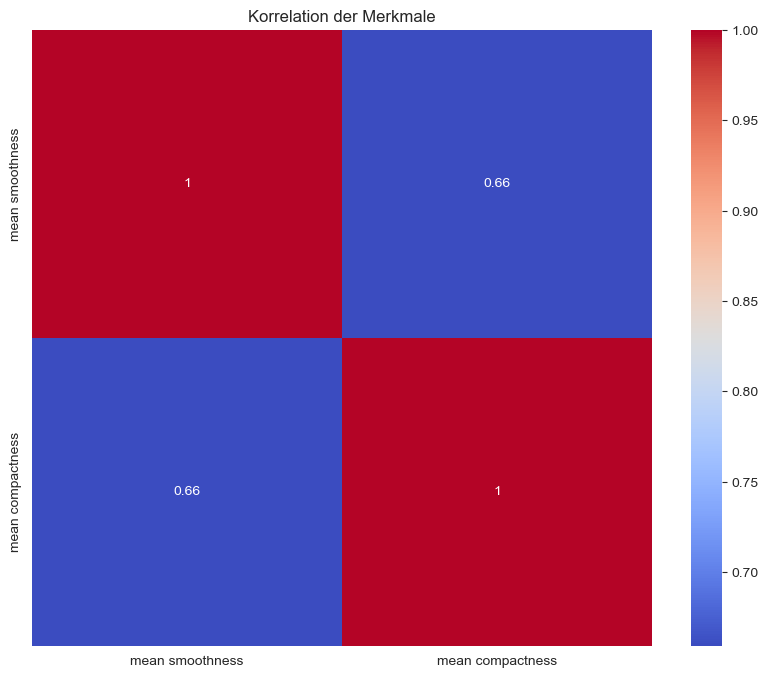

In [106]:
import seaborn as sns
# Korrelationen mit einer Heatmap visualisiert
plt.figure(figsize=(10, 8))
sns.heatmap(data_features[[column_names[4], column_names[5]]].corr(), annot=True, cmap="coolwarm")
plt.title("Korrelation der Merkmale")
plt.show()

Accuracy: 0.9708


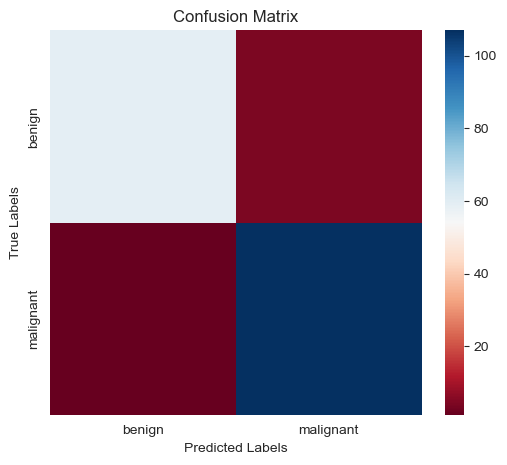

In [115]:
#Random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix
import seaborn as sns

X = data_features[[column_names[i] for i in range(0, 30)]]

y=data_targets
# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modellinitialisierung
model_forest =RandomForestClassifier(n_estimators=100, random_state=42)

# Modelltraining
model_forest.fit(X_train, y_train)

# Vorhersagen
y_pred = model_forest.predict(X_test)


# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_forest:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="RdBu", xticklabels=["benign", "malignant"],  yticklabels=["benign", "malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [68]:
#gridsearch
from sklearn.model_selection import GridSearchCV

# Parameter Grid für n_estimators
param_grid = {'n_estimators': [50, 100, 200, 500]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Beste Parameter und Leistung
print(f"Beste n_estimators: {grid_search.best_params_}")
print(f"Beste Genauigkeit: {grid_search.best_score_}")

Beste n_estimators: {'n_estimators': 200}
Beste Genauigkeit: 0.9582417582417584


Accuracy: 0.9181


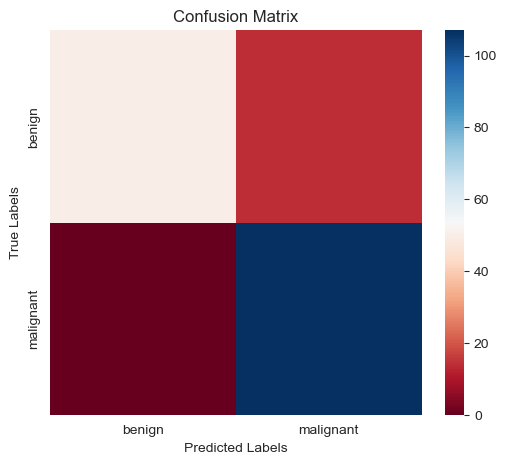

In [120]:

import numpy as np
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix

X = data_features[[column_names[i] for i in range(0, 30)]]

y=data_targets
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=0.1, random_state=200)

# Fit the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)


# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="RdBu", xticklabels=["benign", "malignant"],  yticklabels=["benign", "malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [110]:
# Parameter Grid für C
param_grid = {'C': [0.1, 1, 10, 100]}
svm_model = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Beste Parameter und Leistung
print(f"Beste C: {grid_search.best_params_}")
print(f"Beste Genauigkeit: {grid_search.best_score_}")

Beste C: {'C': 100}
Beste Genauigkeit: 0.9224937343358395


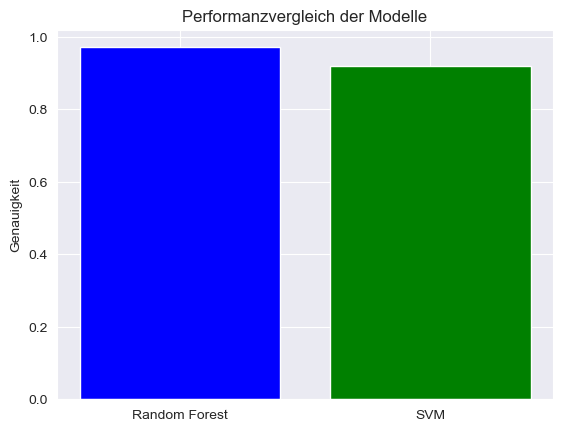

In [121]:
#Visualisierung der Genauigkeiten:
plt.bar(['Random Forest', 'SVM'], [accuracy_forest, accuracy_svm], color=['blue', 'green'])
plt.ylabel("Genauigkeit")
plt.title("Performanzvergleich der Modelle")
plt.show()